# CUSTOMER JOURNEY ANALYSIS

## CUSTOMER SATISFACTION SCORE(CSS) & NET PROMOTER SCORE(NPS)

## Airline Satisfaction Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore")

In [2]:
df = pd.read_excel("airlineSatisfactionData.xlsx")

In [3]:
df_ = df.copy()

In [4]:
df.shape

(103904, 24)

In [5]:
df = df[df["Gender"]=="Female"]  #.reset_index()

In [6]:
df.shape

(52621, 24)

In [7]:
df.head()

,ID,Gender,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,NPS
1,2,Female,35,Business travel,Business,821,26,39.00000,2,3,2,3,4,5,4,5,5,5,5,4,5,5,4,8
4,5,Female,49,Business travel,Business,3470,0,1.00000,3,4,3,4,4,5,4,5,3,5,3,4,3,5,4,8
7,8,Female,60,Business travel,Business,853,0,3.00000,5,4,4,5,4,5,4,4,3,5,3,4,3,5,4,9
9,10,Female,38,Personal Travel,Business,2822,13,0.00000,2,3,5,3,4,5,4,5,5,5,5,4,5,5,4,9
10,11,Female,28,Business travel,Business,821,0,5.00000,1,2,1,4,3,2,2,3,2,5,3,4,4,3,3,4


In [8]:
df.index

Int64Index([     1,      4,      7,      9,     10,     11,     16,     17,
                18,     19,
            ...
            103888, 103889, 103891, 103894, 103895, 103897, 103898, 103899,
            103900, 103903],
           dtype='int64', length=52621)

In [9]:
df.columns

Index(['ID', 'Gender', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction',
       'NPS'],
      dtype='object')

In [10]:
df['Inflight entertainment'].value_counts()

5    32206
3    14438
4     4879
2     1098
Name: Inflight entertainment, dtype: int64

In [11]:
df.columns

Index(['ID', 'Gender', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction',
       'NPS'],
      dtype='object')

In [12]:
# bu kolonlari secme sebebimiz; bu kolonlarin nps degerlerini etkkiledigini ve
# musteri memnuniyet sonuclari oldugunu bildigimiz icin (1 le 5 arasinda deger alanlar)

In [13]:
target_columns = ['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']

In [14]:
# df['Inflight wifi service'][df['Inflight wifi service']==1] = 0 asagidaki for un tek satiri

In [15]:
for col in target_columns:
    df[col][df[col]==1] = 0
    df[col][df[col]==2] = 20
    df[col][df[col]==3] = 50
    df[col][df[col]==4] = 80
    df[col][df[col]==5] = 100
df.head()

,ID,Gender,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,NPS
1,2,Female,35,Business travel,Business,821,26,39.00000,20,50,20,50,80,100,80,100,100,100,100,80,100,100,80,8
4,5,Female,49,Business travel,Business,3470,0,1.00000,50,80,50,80,80,100,80,100,50,100,50,80,50,100,80,8
7,8,Female,60,Business travel,Business,853,0,3.00000,100,80,80,100,80,100,80,80,50,100,50,80,50,100,80,9
9,10,Female,38,Personal Travel,Business,2822,13,0.00000,20,50,100,50,80,100,80,100,100,100,100,80,100,100,80,9
10,11,Female,28,Business travel,Business,821,0,5.00000,0,20,0,80,50,20,20,50,20,100,50,80,80,50,50,4


In [16]:
df['Inflight entertainment'].value_counts()

100    32206
50     14438
80      4879
20      1098
Name: Inflight entertainment, dtype: int64

In [17]:
df[target_columns].head()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
1,20,50,20,50,80,100,80,100,100,100,100,80,100,100,80
4,50,80,50,80,80,100,80,100,50,100,50,80,50,100,80
7,100,80,80,100,80,100,80,80,50,100,50,80,50,100,80
9,20,50,100,50,80,100,80,100,100,100,100,80,100,100,80
10,0,20,0,80,50,20,20,50,20,100,50,80,80,50,50


### Correlation and Heatmap

In [22]:
df[target_columns].corr()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
Inflight wifi service,1.00000,0.32941,0.68341,0.27677,0.52985,0.39686,0.08765,0.20904,0.15370,0.25230,0.15140,0.04222,0.14226,0.10056,0.72957
Departure/Arrival time convenient,0.32941,1.00000,0.45168,0.43610,0.28328,0.11553,0.03632,-0.01195,0.03523,-0.00457,0.03359,0.08437,0.02971,0.03278,0.33163
Ease of Online booking,0.68341,0.45168,1.00000,0.41508,0.38592,0.36331,0.02231,0.03815,0.03764,0.16723,0.03539,0.02014,0.03257,0.00858,0.54378
Gate location,0.27677,0.43610,0.41508,1.00000,0.16214,-0.02494,-0.01813,-0.01551,-0.05513,-0.02529,-0.01061,-0.05190,-0.01335,-0.02625,0.26725
Food and drink,0.52985,0.28328,0.38592,0.16214,1.00000,0.33943,0.31190,0.48623,0.52180,0.39182,0.51790,0.29592,0.64574,0.32775,0.72932
Online boarding,0.39686,0.11553,0.36331,-0.02494,0.33943,1.00000,0.39604,0.19505,0.11011,0.08065,0.03885,0.18476,0.03307,0.29370,0.38229
Seat comfort,0.08765,0.03632,0.02231,-0.01813,0.31190,0.39604,1.00000,0.48017,0.11915,0.09262,0.05608,0.20199,0.05307,0.61829,0.30038
Inflight entertainment,0.20904,-0.01195,0.03815,-0.01551,0.48623,0.19505,0.48017,1.00000,0.45075,0.29349,0.40983,0.09391,0.44339,0.56631,0.37263
On-board service,0.15370,0.03523,0.03764,-0.05513,0.52180,0.11011,0.11915,0.45075,1.00000,0.35340,0.57360,0.21476,0.62039,0.11673,0.33963
Leg room service,0.25230,-0.00457,0.16723,-0.02529,0.39182,0.08065,0.09262,0.29349,0.35340,1.00000,0.36825,0.13757,0.36418,0.08993,0.31458


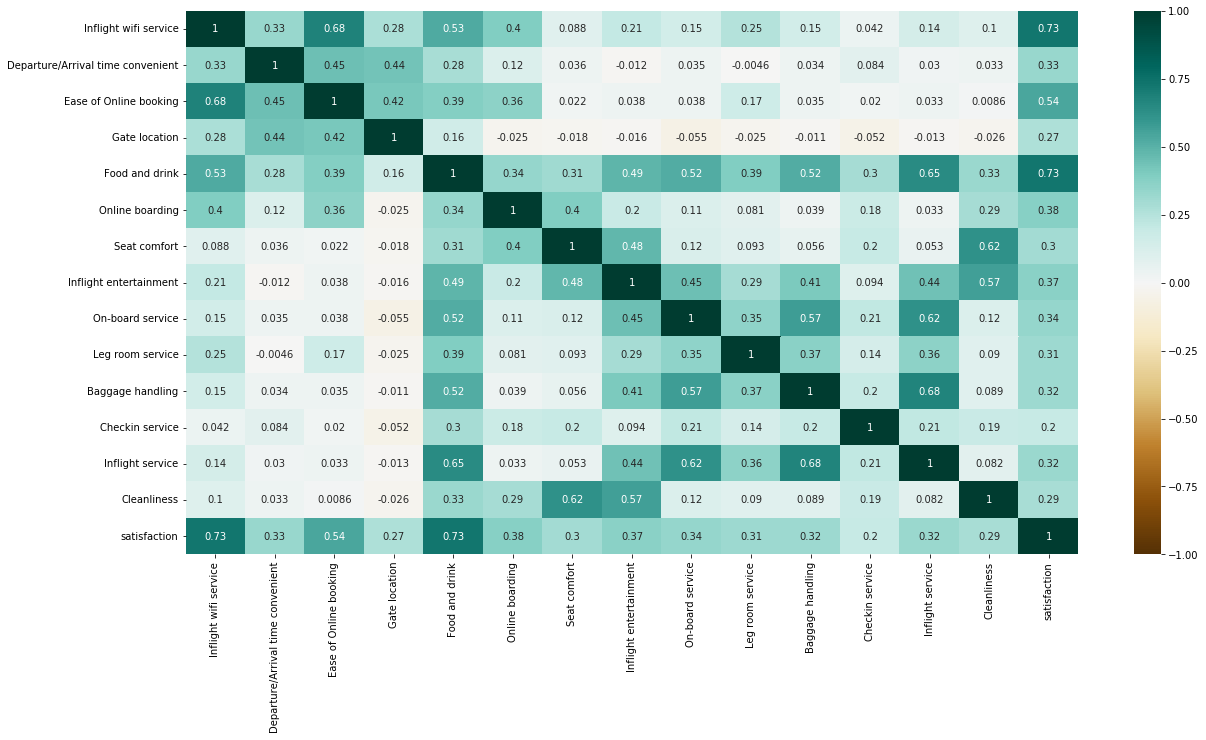

In [23]:
plt.figure(figsize=(20, 10))
sns.heatmap(df[target_columns].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG');

In [24]:
df_corr= df[target_columns].corr()

In [25]:
df_corr.head()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
Inflight wifi service,1.00000,0.32941,0.68341,0.27677,0.52985,0.39686,0.08765,0.20904,0.15370,0.25230,0.15140,0.04222,0.14226,0.10056,0.72957
Departure/Arrival time convenient,0.32941,1.00000,0.45168,0.43610,0.28328,0.11553,0.03632,-0.01195,0.03523,-0.00457,0.03359,0.08437,0.02971,0.03278,0.33163
Ease of Online booking,0.68341,0.45168,1.00000,0.41508,0.38592,0.36331,0.02231,0.03815,0.03764,0.16723,0.03539,0.02014,0.03257,0.00858,0.54378
Gate location,0.27677,0.43610,0.41508,1.00000,0.16214,-0.02494,-0.01813,-0.01551,-0.05513,-0.02529,-0.01061,-0.05190,-0.01335,-0.02625,0.26725
Food and drink,0.52985,0.28328,0.38592,0.16214,1.00000,0.33943,0.31190,0.48623,0.52180,0.39182,0.51790,0.29592,0.64574,0.32775,0.72932


In [26]:
df_final = df_corr[["satisfaction"]]

In [27]:
df_final.head(100)

,satisfaction
Inflight wifi service,0.72957
Departure/Arrival time convenient,0.33163
Ease of Online booking,0.54378
Gate location,0.26725
Food and drink,0.72932
Online boarding,0.38229
Seat comfort,0.30038
Inflight entertainment,0.37263
On-board service,0.33963
Leg room service,0.31458


In [28]:
df_final.columns

Index(['satisfaction'], dtype='object')

In [29]:
df_final.columns =  ["Importance"]
df_final.head()

,Importance
Inflight wifi service,0.72957
Departure/Arrival time convenient,0.33163
Ease of Online booking,0.54378
Gate location,0.26725
Food and drink,0.72932


In [30]:
df[target_columns].mean()

Inflight wifi service               42.42546
Departure/Arrival time convenient   71.81125
Ease of Online booking              44.23652
Gate location                       71.53456
Food and drink                      61.31278
Online boarding                     78.28167
Seat comfort                        62.50090
Inflight entertainment              82.75745
On-board service                    59.80293
Leg room service                    77.55991
Baggage handling                    65.66181
Checkin service                     78.03101
Inflight service                    65.86553
Cleanliness                         77.00215
satisfaction                        61.58511
dtype: float64

In [31]:
# st.sp si ne kadar yuksekse serviste bir stabillik yoktur manasinda olur.
# dusuk standart sapma istiyoruz

In [32]:
df[target_columns].std()

Inflight wifi service               38.25800
Departure/Arrival time convenient   31.59911
Ease of Online booking              34.69946
Gate location                       29.16401
Food and drink                      20.43080
Online boarding                     27.80287
Seat comfort                        34.05573
Inflight entertainment              23.64909
On-board service                    33.99478
Leg room service                    27.67910
Baggage handling                    31.83531
Checkin service                     27.46903
Inflight service                    31.60333
Cleanliness                         28.12762
satisfaction                        15.38773
dtype: float64

In [33]:
pd.DataFrame({"Satisfaction": df[target_columns].mean(), "Service Quality": df[target_columns].std()})

,Satisfaction,Service Quality
Inflight wifi service,42.42546,38.25800
Departure/Arrival time convenient,71.81125,31.59911
Ease of Online booking,44.23652,34.69946
Gate location,71.53456,29.16401
Food and drink,61.31278,20.43080
Online boarding,78.28167,27.80287
Seat comfort,62.50090,34.05573
Inflight entertainment,82.75745,23.64909
On-board service,59.80293,33.99478
Leg room service,77.55991,27.67910


In [34]:
df_2 = pd.DataFrame({"Satisfaction": df[target_columns].mean(), "Service Quality": df[target_columns].std()})

In [35]:
df_2["Ratio"] = df_2["Service Quality"] / df_2["Satisfaction"] # memnunlar ama surekli mi? memnun degilse... # oranin dusuk olmasini istiyoruz

In [36]:
# 0.33 ve alti istenen ratio degerleri

In [37]:
df_2.head()

,Satisfaction,Service Quality,Ratio
Inflight wifi service,42.42546,38.25800,0.90177
Departure/Arrival time convenient,71.81125,31.59911,0.44003
Ease of Online booking,44.23652,34.69946,0.78441
Gate location,71.53456,29.16401,0.40769
Food and drink,61.31278,20.43080,0.33322


In [38]:
df_final = df_final.join(df_2)

In [39]:
df_final.head()

,Importance,Satisfaction,Service Quality,Ratio
Inflight wifi service,0.72957,42.42546,38.25800,0.90177
Departure/Arrival time convenient,0.33163,71.81125,31.59911,0.44003
Ease of Online booking,0.54378,44.23652,34.69946,0.78441
Gate location,0.26725,71.53456,29.16401,0.40769
Food and drink,0.72932,61.31278,20.43080,0.33322


In [40]:
import matplotlib.pyplot as plt
#import seaborn as sns

In [41]:
df_final.index

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction'],
      dtype='object')

In [42]:
# columns isimleri grafikte duzgun görunsun diye kisalttik

In [43]:
target_columns_abv = ['IWS', 'DAC',
       'OBO', 'GL', 'FD',
       'OBR', 'SC', 'IE',
       'OBS', 'LRS', 'BH',
       'CS', 'IS', 'CLS', 'STS']

In [44]:
df_final["Importance"]

Inflight wifi service               0.72957
Departure/Arrival time convenient   0.33163
Ease of Online booking              0.54378
Gate location                       0.26725
Food and drink                      0.72932
Online boarding                     0.38229
Seat comfort                        0.30038
Inflight entertainment              0.37263
On-board service                    0.33963
Leg room service                    0.31458
Baggage handling                    0.31811
Checkin service                     0.19859
Inflight service                    0.32240
Cleanliness                         0.28755
satisfaction                        1.00000
Name: Importance, dtype: float64

### Satisfaction map

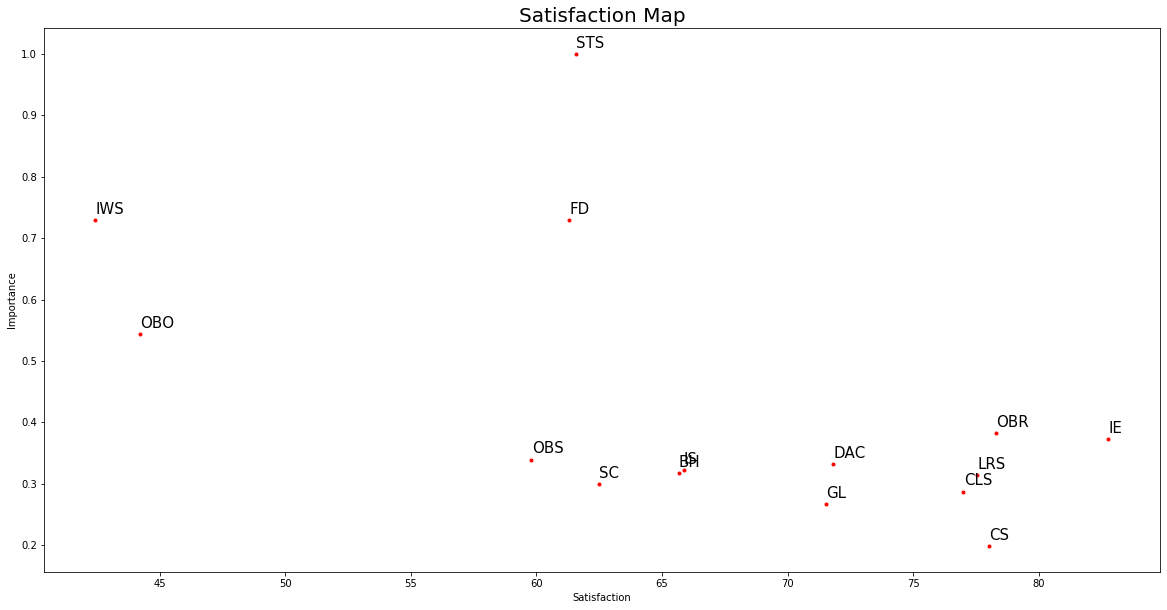

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

types = target_columns_abv
x_coords = df_final["Satisfaction"]
y_coords = df_final["Importance"]

plt.title("Satisfaction Map", fontsize=20)
plt.xlabel("Satisfaction")
plt.ylabel("Importance")


for i,type in enumerate(types):  # enumerate birden cok deger kullanirken??
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='.', color='red')
    plt.text(x+0.01, y+0.01, type, fontsize=15)
    
    
plt.show()

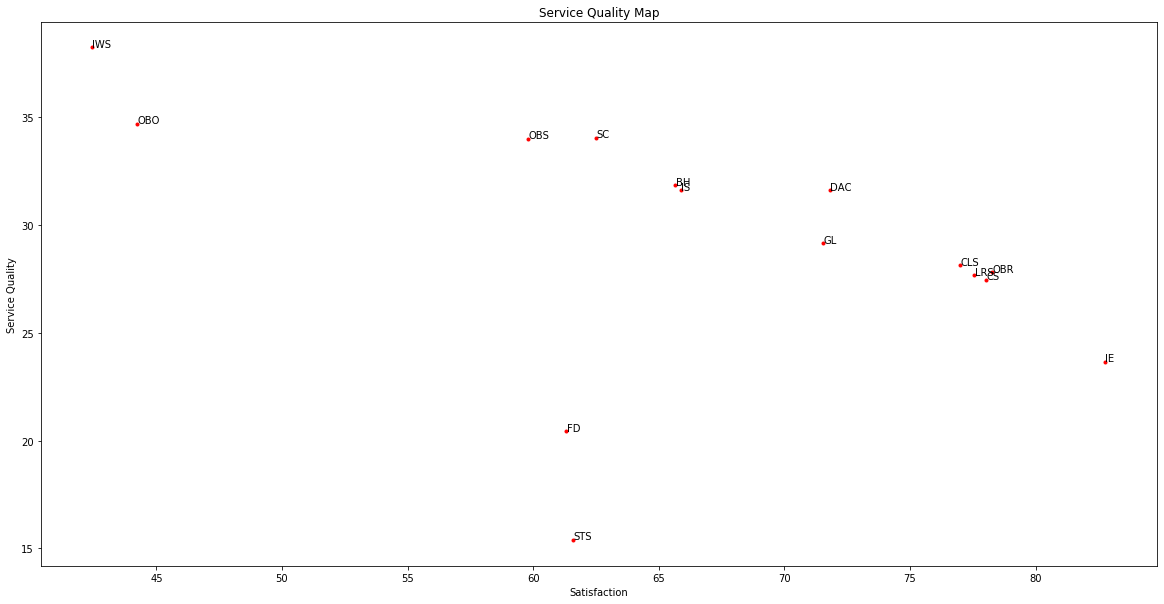

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

# simulating a pandas df['type'] column
types = target_columns_abv
x_coords = df_final["Satisfaction"]
y_coords = df_final["Service Quality"]

plt.title("Service Quality Map")
plt.xlabel("Satisfaction")
plt.ylabel("Service Quality")


for i,type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='.', color='red')
    plt.text(x+0.02, y+0.02, type, fontsize=10)
plt.show()

In [47]:
# erkek ve kadin karsilastirmasinda;
# seat comfortta farklilik var importance erkeklerde daha yuksek; bacak boyu uzun old. icin konfora daha önem veriyor olabilirler.


### Eco Uçan Male ve Eco Uçan Female  tablolarini kiyaslayin farklari yorumlayin.

In [48]:
# Varsayimlari kontrol ederek parametrik test mi non parametrik test mi yapacagimiza karar verecegiz.
# 1- Data metrik mi?
# 2- Normal dagilim mi? (shapiro)
# 3- Yeterli sayida gözlem elde edilmis mi?  (103904, 24) 

# Hepsi evetse; parametrik   
#       degilse; non parametrik test

In [49]:
df_.head()

,ID,Gender,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,NPS
0,1,Male,48,Business travel,Business,821,2,5.00000,3,4,3,4,4,4,5,5,3,3,5,5,5,5,4,5
1,2,Female,35,Business travel,Business,821,26,39.00000,2,3,2,3,4,5,4,5,5,5,5,4,5,5,4,8
2,3,Male,41,Business travel,Business,853,0,0.00000,5,5,4,5,4,5,5,5,3,4,3,5,3,5,4,9
3,4,Male,50,Personal Travel,Business,1905,0,0.00000,1,3,2,3,4,5,5,5,5,5,5,4,5,5,3,9
4,5,Female,49,Business travel,Business,3470,0,1.00000,3,4,3,4,4,5,4,5,3,5,3,4,3,5,4,8


In [50]:
data_eco = df_.loc[ df_["Class"]== "Eco" ]
data_eco.head()

,ID,Gender,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,NPS
12,13,Male,24,Business travel,Eco,453,16,30.00000,1,3,2,5,3,3,5,5,2,5,4,3,4,5,3,5
14,15,Male,52,Personal Travel,Eco,853,0,0.00000,2,5,2,5,4,3,2,3,3,4,5,4,5,3,3,8
15,16,Male,70,Personal Travel,Eco,821,0,0.00000,1,5,2,2,4,3,5,5,4,3,4,5,5,5,3,9
16,17,Female,61,Personal Travel,Eco,821,0,0.00000,2,5,2,2,4,2,5,5,5,3,5,5,5,2,3,7
17,18,Female,11,Personal Travel,Eco,853,0,0.00000,3,5,3,3,4,4,5,5,3,3,4,5,5,5,4,8


In [78]:
### 1. BAKIS ACISI
### Eco Uçan Male ve Eco Uçan Female  tablolarini kiyaslayin farklari yorumlayin.

In [65]:
df_Male = data_eco[ data_eco["Gender"]== "Male"]
df_Female = data_eco[ data_eco["Gender"]== "Female"]

In [75]:
#df_Male.head()

In [68]:
groups = [df_Male, df_Female]

for group in groups:
    for col in target_columns:
        group[col][group[col]==1] = 0
        group[col][group[col]==2] = 20          
        group[col][group[col]==3] = 50
        group[col][group[col]==4] = 80
        group[col][group[col]==5] = 100


In [69]:
df_corr_female= df_Female[target_columns].corr()
df_corr_male= df_Male[target_columns].corr()

In [70]:
df_final_female = df_corr_female[["satisfaction"]]
df_final_male = df_corr_male[["satisfaction"]]

In [71]:
df_final_female.columns =  ["Importance"]
df_final_male.columns =  ["Importance"]

In [73]:
df_2_female = pd.DataFrame({"Satisfaction": df_Female[target_columns].mean(), "Service Quality": df_Female[target_columns].std()})
df_2_female["Ratio"] = df_2_female["Service Quality"] / df_2_female["Satisfaction"] 
df_female_final = df_final_female.join(df_2_female)
df_female_final

,Importance,Satisfaction,Service Quality,Ratio
Inflight wifi service,0.68490,40.50371,36.62441,0.90422
Departure/Arrival time convenient,0.17789,74.88148,31.15524,0.41606
Ease of Online booking,0.48428,40.46156,32.36004,0.79977
Gate location,0.03641,72.92588,27.87792,0.38228
Food and drink,0.68980,57.50146,19.83837,0.34501
Online boarding,0.37884,71.46440,29.06420,0.40669
Seat comfort,0.25199,55.76413,35.16929,0.63068
Inflight entertainment,0.34057,78.54353,24.87829,0.31675
On-board service,0.27389,52.78483,34.75196,0.65837
Leg room service,0.25965,71.65721,29.05470,0.40547


In [74]:
df_2_male = pd.DataFrame({"Satisfaction": df_Male[target_columns].mean(), "Service Quality": df_Male[target_columns].std()})
df_2_male["Ratio"] = df_2_male["Service Quality"] / df_2_male["Satisfaction"] 
df_male_final = df_final_male.join(df_2_male)
df_male_final

,Importance,Satisfaction,Service Quality,Ratio
Inflight wifi service,0.69414,41.68942,36.90326,0.88519
Departure/Arrival time convenient,0.15991,75.89343,30.97230,0.40810
Ease of Online booking,0.49280,41.12496,32.48526,0.78992
Gate location,0.04882,72.79946,27.99903,0.38460
Food and drink,0.65894,59.27709,19.38185,0.32697
Online boarding,0.56572,66.21384,29.33151,0.44298
Seat comfort,0.38841,51.64421,36.13019,0.69960
Inflight entertainment,0.33723,79.09801,24.61642,0.31121
On-board service,0.14220,54.12062,34.20245,0.63197
Leg room service,0.07937,74.40460,28.39710,0.38166


In [63]:
### 2. BAKIS ACISI
### Eco Uçan Male ve Eco Uçan Female  tablolarini kiyaslayin farklari yorumlayin.

data_eco.groupby("Gender").agg ({'Inflight wifi service': "mean", 
                                 'Departure/Arrival time convenient': "mean",
                                 'Ease of Online booking': "mean", 
                                 'Gate location': "mean", 
                                 'Food and drink': "mean",
                                 'Online boarding': "mean", 
                                 'Seat comfort': "mean", 
                                 'Inflight entertainment': "mean",
                                 'On-board service': "mean", 
                                 'Leg room service': "mean", 
                                 'Baggage handling': "mean",
                                 'Checkin service': "mean", 
                                 'Inflight service': "mean", 
                                 'Cleanliness': "mean", 
                                 'satisfaction': "mean"})

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
Gender,,,,,,,,,,,,,,,
Female,2.62862,4.00029,2.63738,3.88102,3.25086,3.83912,3.21179,4.12674,3.09816,3.85076,3.36708,3.93869,3.37347,3.91295,3.29551
Male,2.67559,4.04100,2.66150,3.87750,3.31067,3.63482,3.06211,4.14779,3.14370,3.95804,3.53834,3.97766,3.55906,3.91182,3.31089


### Memnuniyet skorlari arasinda anlamli bir fark var mi testini yapin.

In [80]:
# Karsilastirma icin Satisfaction kolonu kullanildi.

In [54]:
shapiro(data_eco.loc[data_eco["Gender"]== "Female",  "satisfaction"])

ShapiroResult(statistic=0.5903546214103699, pvalue=0.0)

In [55]:
shapiro(data_eco.loc[data_eco["Gender"]== "Male",  "satisfaction"])

ShapiroResult(statistic=0.6046158075332642, pvalue=0.0)

In [56]:
# statistic, Test Stat = Z degeri

In [57]:
test_stat, pvalue = shapiro(data_eco.loc[data_eco["Gender"]== "Female",  "satisfaction"])
print("Test Stat = %.4f p-value = %.4f" % (test_stat, pvalue))

Test Stat = 0.5904 p-value = 0.0000


In [58]:
test_stat, pvalue = shapiro(data_eco.loc[data_eco["Gender"]== "Male",  "satisfaction"])
print("Test Stat = %.4f p-value = %.4f" % (test_stat, pvalue))

Test Stat = 0.6046 p-value = 0.0000


In [59]:
# p < 0.05 oldugundan H0 red edilir. Yani dagilim  normal degildir. Varsayim saglanmaz.
# iki farkli grubu karsilastiriyoruz( female- male ) = independent sample tests
# varsayim gerceklesmedigi icin, normal degildir, nonparametrik test kullaniyoruz == mannwhitneyu testi kullanilmali.

In [60]:
test_stat, pvalue = mannwhitneyu(data_eco.loc[data_eco["Gender"]== "Female",  "satisfaction"],
                                 data_eco.loc[data_eco["Gender"]== "Male",  "satisfaction"])
print("Test Stat = %.4f p-value = %.4f" % (test_stat, pvalue))

Test Stat = 269166403.5000 p-value = 0.0011


In [61]:
# p < 0.05 oldugundan, kadin ve erkeklerin memnuniyet skorlari arasinda anlamli fark vardir. 